In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.41


Let's say we have a track like:

<img src="images/track.png" width=30%>

and I want to start by moving until I am inside, and then once inside stay inside.  I can think of this in terms of two behaviors:

1. approach to get inside the track
2. wander, but keep in the track

But these can br broken up into smaller pieces

1. approach to get inside the track
    1. go forward
    2. look for black
    3. once I see black switch to looking for white
    4. once I see white I'm inside, so do the wander task
2. wander, but keep in the track
    1. go forward
    2. look for black
    3. once I see black, do avoidance behavior, then back to go forward
    
where the avoidance behavior might be:

1. switch to moving back for a short time/distance
2. rotate randomly for a short time/distance



In [3]:
def forward(t,robot):
    robot['sally'].F=10
    return True

In [4]:
def until_black(t,robot):
    color=robot['sally'].read_color()
    
    r,g,b,a=color
    
    if r<0.2 and g<0.2 and b<0.2:
        return True
    else:
        return False

In [5]:
def monitor(t,robot):
    r,g,b,a=robot['sally'].read_color()
    robot.message='%.2f %.2f %.2f %.2f %s' % (r,g,b,a,robot.controller.current_state)

In [6]:
def until_white(t,robot):
    color=robot['sally'].read_color()
    
    try:
        r,g,b,a=color
    except ValueError:
        r,g,b=color
        a=255
    
    if r>0.5 and g>0.5 and b>0.5:
        return True
    else:
        return False

In [7]:
def reverse_for_a_bit(t,robot):
    robot['sally'].F=-5
    if t>1:
        robot['sally'].F=0
        return True
    
def turn_for_a_bit(t,robot):
    if robot['sally'].τ==0:
        robot['sally'].τ=random.choice([-1.0,1.0])
        
    if t>1:
        robot['sally'].τ=0
        return True    

In [8]:
def build(robot):
    box=Box(robot,x=3,y=12,name="sally")

In [9]:
state_machine_wander=StateMachine(
    (forward,'until_black'),
    (until_black,'reverse_for_a_bit'),
    (reverse_for_a_bit,'turn_for_a_bit'),
    (turn_for_a_bit,'forward'),
)



state_machine_approach=StateMachine(
    (forward,'until_black'),
    (until_black,'until_white'),
    (until_white,state_machine_wander),
)



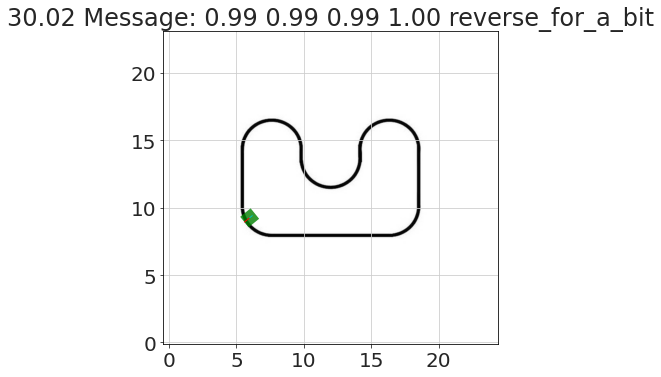

In [10]:
env=FrictionEnvironment(image="images/track.png")
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine_approach)
robot.controller.monitor=monitor


run_sim(env,robot.controller,
        figure_width=6,
       total_time=30,
       dt_display=0.3,  # make this larger for a faster display
       )


In [38]:
random.choice([-1,1])

-1